# Análisis de clientes

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando datos
url = "C:/Users/USUARIO/Desktop/Proyectos/Sistema_recomendacion/data/raw/data_raw.csv"
data = pd.read_csv(url, sep=',', encoding='latin1')

1. Perfilar a los clientes en función de su frecuencia de compra: Cálcular la frecuencia de compra de cada cliente.

In [42]:
# Creando nuevo objeto DataFrame con el id de los clientes y la frecuencia de compra
frecuencia_compra = data.groupby("Customer ID")["Order ID"].count().reset_index()
# Renombrando columnas
frecuencia_compra.columns = ["CustomerID", "Frequency"]
# Ordenar por mayor frecuencia de compra
frecuencia_compra = frecuencia_compra.sort_values(by="Frequency", ascending=False)
# Mostrar los 10 clientes que más compran
print(frecuencia_compra.head(10)) # Cambiar el valor para mostrar más o menos datos.

     CustomerID  Frequency
1206   PO-18850         97
150    BE-11335         94
733    JG-15805         90
1459   SW-20755         89
1099   MY-18295         85
538    EM-13960         85
1587   ZC-21910         84
1067   MP-17965         84
294    CK-12205         83
237    BW-11110         81


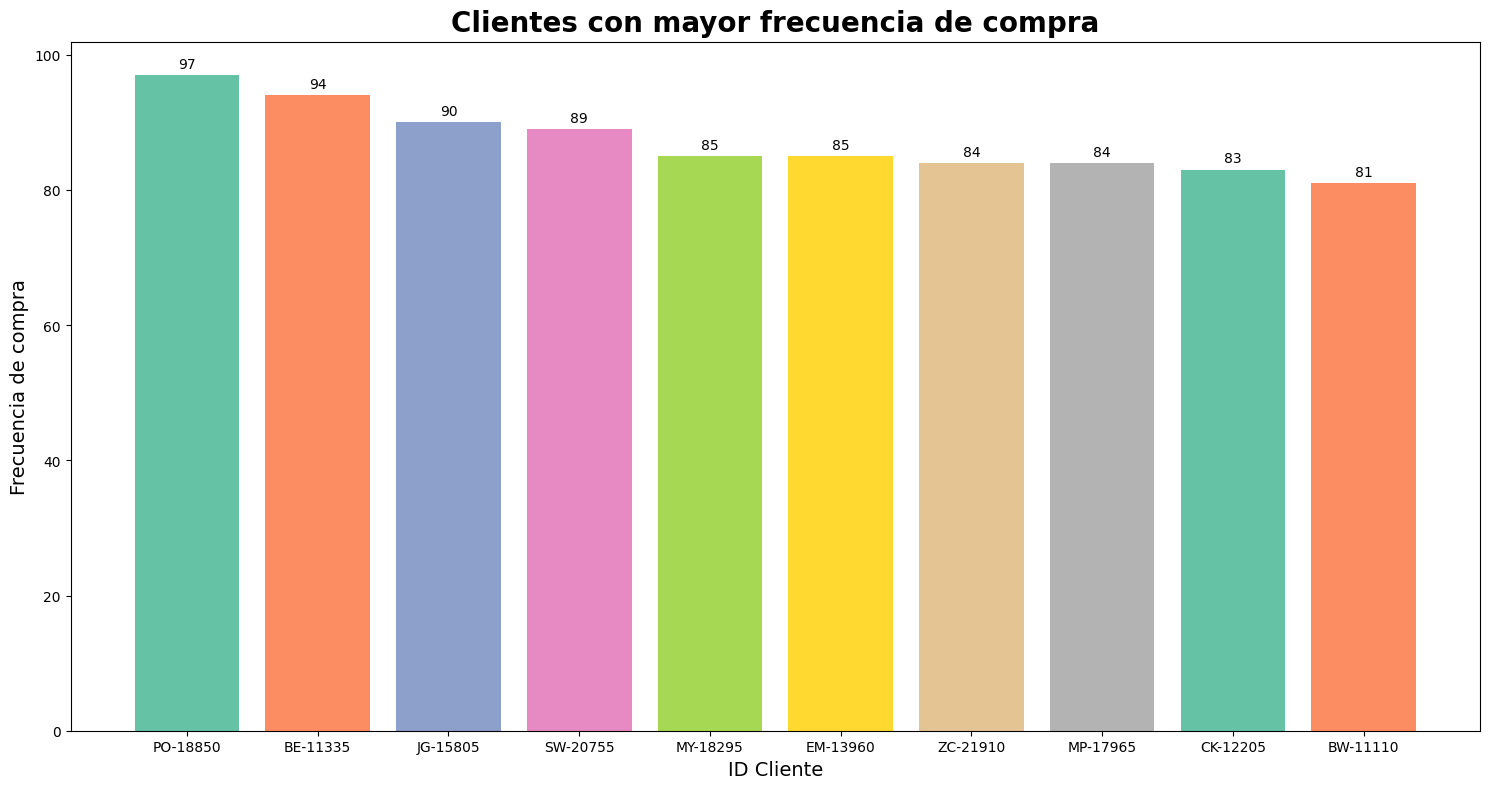

In [75]:
# Seleccionando las 10 primeras filas
customer = frecuencia_compra["CustomerID"].iloc[0:10]
frecuencia = frecuencia_compra["Frequency"].iloc[0:10]
# Definiendo paleta de color, mostrar cada barra con un color diferente 
color = sns.color_palette("Set2")

# Creando la cuadricula y figura
plt.figure(figsize=(15, 8))
# Asignar el objeto BarContainer a la variable bars
bars = plt.bar(customer, frecuencia, color=color)

# Agregar etiquetas a las barras del objeto BarContainer
plt.bar_label(bars, fmt="%.0f", padding=3)
plt.title("Clientes con mayor frecuencia de compra", fontsize=20, fontweight="bold", pad=8)
plt.ylabel("Frecuencia de compra", fontsize=14)
plt.xlabel("ID Cliente", fontsize=14)

# Ajustar elementos dentro de la figura
plt.tight_layout()
plt.show()

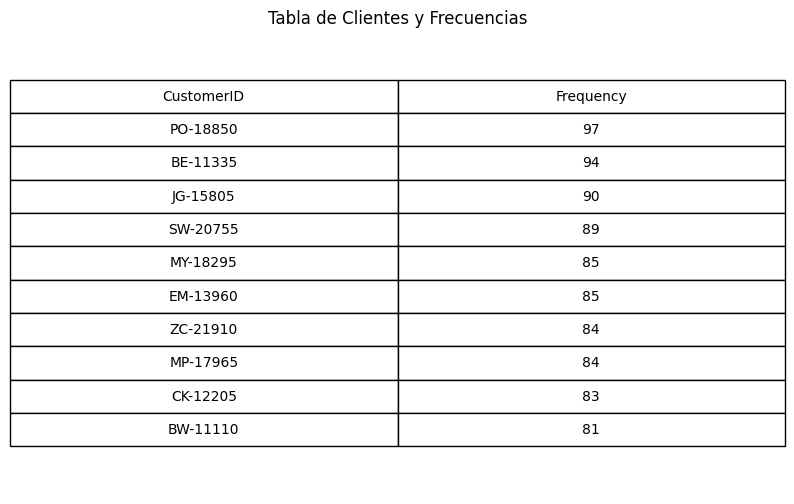

In [44]:
# Tabla para mostrar la frecuencia de compra de cada cliente
fig, ax = plt.subplots(figsize=(10, 6))
# Ajustar los límites de ejes al rango de los datos
ax.axis('tight')
# Desactivar la visualización de los ejes
ax.axis('off')
# Tabla con los 10 clientes con mayor frecuencia de compra
table = ax.table(cellText=frecuencia_compra.iloc[0:10].values, colLabels=frecuencia_compra.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.title("Tabla de Clientes y Frecuencias")
plt.show()


2. ¿Los clientes frecuentes contribuyen con más ingresos?

    CustomerID  Frequency      Profit
215   TC-20980         59  8787.47490
120   RB-19360         65  8523.95150
359   SC-20095         53  8106.21790
1     BE-11335         94  7790.69630
517   HL-15040         47  7657.50178
162   AB-10105         62  6912.61450
199   SP-20920         60  6649.62626
15    HM-14860         79  6544.88640
121   TA-21385         65  6274.98910
23    SE-20110         75  5863.62392


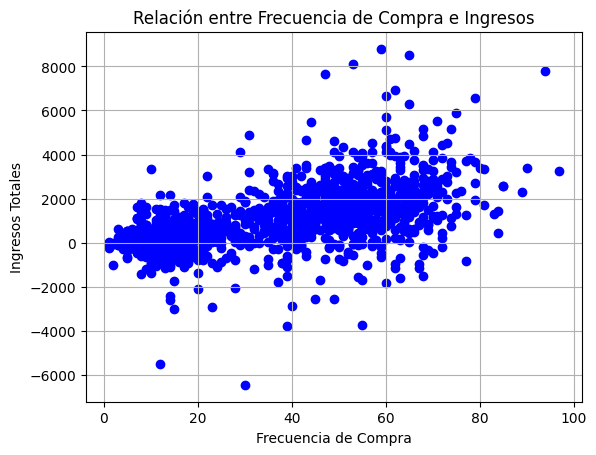

In [45]:
# DataFrame de id clientes y ganancias proporcionadas a la tienda
clientes_ingresos = data.groupby("Customer ID")["Profit"].sum().reset_index()
clientes_ingresos.columns = ["CustomerID", "Profit"]
clientes_ingresos = clientes_ingresos.sort_values(by="Profit", ascending=False)

# Unión de los dataframe frecuencia compra y cliente ingresos por la columna 'CustomerID"
perfil_clientes = pd.merge(frecuencia_compra, clientes_ingresos, on="CustomerID")
perfil_clientes = perfil_clientes.sort_values(by='Profit', ascending=False)
print(perfil_clientes.iloc[0:10])

# Análisis gráfico
plt.scatter(perfil_clientes["Frequency"], perfil_clientes["Profit"], color="blue")
plt.xlabel("Frecuencia de Compra")
plt.ylabel("Ingresos Totales")
plt.title("Relación entre Frecuencia de Compra e Ingresos")
plt.grid()
plt.show()

Los clientes que compran con mayor frecuencias. No son los que contribuyen con mayores ingresos. En el gráfico de dispersión se observa que los clientes que compran con una frecuencia entre 40 a 80 son los que contribuyen con mayores ingresos.

3. ¿Son también rentables? ¿Cuál es el margen de beneficio en todos los segmentos?

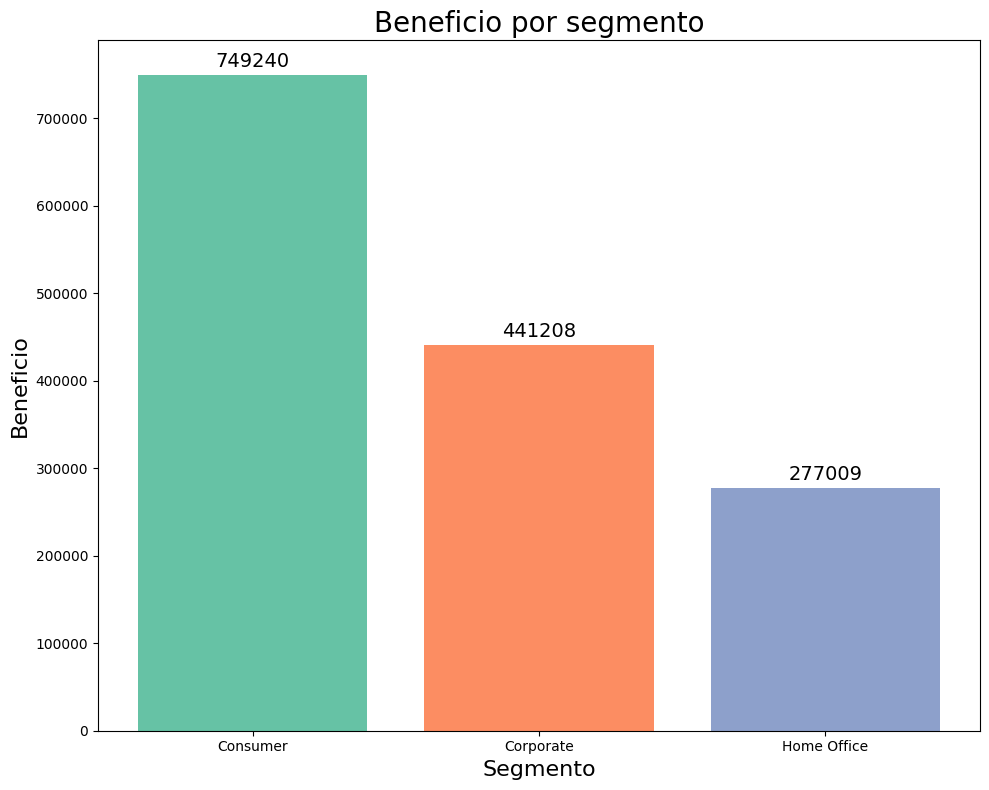

In [46]:
# Crear dataframe agrupando por segmento y sumando las ganancias por segmentos
margen_beneficio = data.groupby('Segment')['Profit'].sum().reset_index()
segment = margen_beneficio["Segment"].values
profit = margen_beneficio["Profit"].values

color = sns.color_palette("Set2")

# Definir la longitud del eje x
x_pos = np.arange(len(profit))

plt.figure(figsize=(10, 8))

bars = plt.bar(x_pos,
        profit,
        color=color)

# Definir la longitud del eje x y las etiquetas
plt.xticks(x_pos, labels=segment)
# Definir el limite del eje y
plt.ylim(top=profit[0] + 40000)
# Agregar etiquetas a las barras del objeto BarContainer
plt.bar_label(bars, fmt="%.0f", padding=3, fontsize=14)
plt.title("Beneficio por segmento", fontsize=20)
plt.xlabel("Segmento", fontsize=16)
plt.ylabel("Beneficio", fontsize=16)

# Ajustar automáticamente elementos dentro de la figura
plt.tight_layout()
plt.show()


El margen de beneficios se refiere a la proporción entre las ganancias netas y los ingresos generados, es expresada normalmente como un porcetaje. 'Sales' hace referencia a las ganancias netas y 'Profit' a los ingresos generados.

In [47]:
# Margen de beneficios totales (ganancias netas/ingresos totales)
margen_bene = (profit.sum() / data["Sales"].sum()) * 100
print(f"El margen de beneficios en todos los segmentos es del {margen_bene:.2f}%")

El margen de beneficios en todos los segmentos es del 11.61%


In [48]:
# Margen de beneficios para cada segmento
for i, col in enumerate(segment):
    margen_consumer = (profit[i].sum() / data[data["Segment"] == col]["Sales"].sum()) * 100
    print(f"El margen de beneficios para el segmento {col} es del {margen_consumer:.2f}%")

El margen de beneficios para el segmento Consumer es del 11.51%
El margen de beneficios para el segmento Corporate es del 11.54%
El margen de beneficios para el segmento Home Office es del 11.99%


El segmento 'Home Office', se puede considerar el más rentable.

4. ¿Qué segmento de clientes es más rentable cada año?

In [49]:
import datetime as dt

# Transformando las columnas a tipo datetime
data['Order Date'] = pd.to_datetime(data["Order Date"], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data["Ship Date"], format='%d-%m-%Y')
data['Year']  = data['Order Date'].dt.year 

In [ ]:
# Calcular las ganancias agrupadas por segmento y año
segmento_año = data.groupby(['Segment', 'Year'])['Profit'].sum().reset_index()
segmento_año.columns = ['Segment', 'Year', 'Profit_Year']
print(segmento_año)

        Segment  Year   Profit_Year
0      Consumer  2011  117337.49406
1      Consumer  2012  165799.19094
2      Consumer  2013  208427.73398
3      Consumer  2014  257675.36308
4     Corporate  2011   84746.93574
5     Corporate  2012   90556.69992
6     Corporate  2013  125707.93908
7     Corporate  2014  140196.75392
8   Home Office  2011   46856.38174
9   Home Office  2012   51059.38824
10  Home Office  2013   72799.55712
11  Home Office  2014  106293.85346


In [ ]:
# Mostrar las ganancias en cada segmento durante un año en específico
for year, group in segmento_año.groupby('Year'):
    print(f"Year: {year}")
    print(group)

Year: 2011
       Segment  Year   Profit_Year
0     Consumer  2011  117337.49406
4    Corporate  2011   84746.93574
8  Home Office  2011   46856.38174
Year: 2012
       Segment  Year   Profit_Year
1     Consumer  2012  165799.19094
5    Corporate  2012   90556.69992
9  Home Office  2012   51059.38824
Year: 2013
        Segment  Year   Profit_Year
2      Consumer  2013  208427.73398
6     Corporate  2013  125707.93908
10  Home Office  2013   72799.55712
Year: 2014
        Segment  Year   Profit_Year
3      Consumer  2014  257675.36308
7     Corporate  2014  140196.75392
11  Home Office  2014  106293.85346


In [ ]:
segmento_año

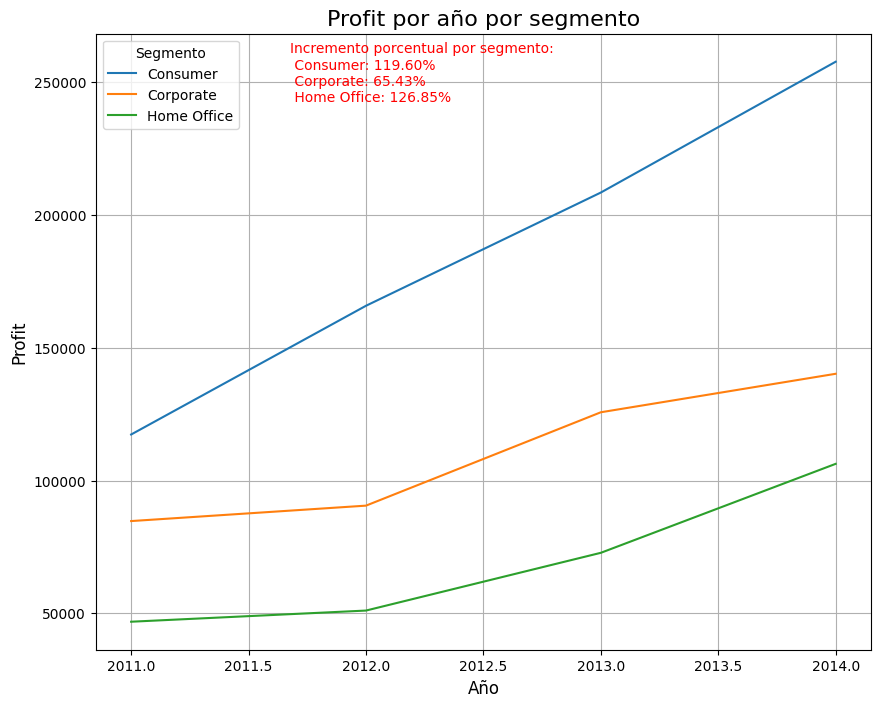

In [ ]:
# Guardar el incremento por año
incre_año = []

# Calcular el incremento porcentual de ganancia a través de los años
for segmento in segmento_año['Segment'].unique():
    # Seleccionar los datos de un segmento en específico
    segmentos = segmento_año[segmento_año["Segment"] == segmento]
    # Tomar cada tres valores incluido el primer valor
    segmentos = segmentos[::3]
    # Tomar el primer valor de 'Profit_Year'
    valor_ini = segmentos['Profit_Year'].iloc[0]
    # Tomar el último valor de 'Profit_Year'
    valor_final = segmentos['Profit_Year'].iloc[-1]
    # Calcular el inclemento porcentual desde 2011 hasta 2014
    incremento_porcentual = (valor_final - valor_ini) / valor_ini * 100
    # Guardar el incremento porcentual de cada segmento en una lista
    incre_año.append((segmento, incremento_porcentual))
    #print(f"El aumento porcentual para {segmento} es de {incremento_porcentual:.2f}%")

# Gráfico del incremento porcentual a través del tiempo
segmento_año = segmento_año.sort_values(by='Year')

plt.figure(figsize=(10, 8))

# Gráfica de la variación de ganancia por año 
sns.lineplot(data=segmento_año, x='Year', y='Profit_Year', hue='Segment', markers='o')

plt.title('Profit por año por segmento', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Segmento', fontsize=10)

# Agregar una anotación de los incrementos porcentuales al gráfico
plt.annotate(f"Incremento porcentual por segmento: \n {incre_año[0][0]}: {incre_año[0][1]:.2f}% \n {incre_año[1][0]}: {incre_año[1][1]:.2f}% \n {incre_año[2][0]}: {incre_año[2][1]:.2f}%", 
             xy=(0.25, 0.89), 
             xycoords='axes fraction', 
             fontsize=10,
             color='red')
plt.grid(True)
plt.show()


El segmento con mayor crecimiento acumulado es Home Office con un 126.85%

In [55]:
# Calcular el cambio fraccional en datos secuenciales (Usamos pct_change()) para calcular el cambio porcentual * 100
segmento_año['Pct_change'] = segmento_año.groupby('Segment')['Profit_Year'].pct_change() * 100
segmento_año['Pct_change'] = segmento_año['Pct_change'].round(2)
segmento_año = segmento_año.sort_values(by=["Segment", "Year"]).reset_index(drop=True)
segmento_año

,Segment,Year,Profit_Year,Pct_change
0,Consumer,2011,117337.49406,NaN
1,Consumer,2012,165799.19094,41.30
2,Consumer,2013,208427.73398,25.71
3,Consumer,2014,257675.36308,23.63
4,Corporate,2011,84746.93574,NaN
5,Corporate,2012,90556.69992,6.86
6,Corporate,2013,125707.93908,38.82
7,Corporate,2014,140196.75392,11.53
8,Home Office,2011,46856.38174,NaN
9,Home Office,2012,51059.38824,8.97


In [56]:
# Calcular el promedio de cambio porcentual por segmento
mean_incremento = segmento_año.groupby('Segment')['Pct_change'].mean().reset_index()
mean_incremento = mean_incremento.rename(columns={"Pct_change": "Avg_Pct_change"})
# Ordenar descendente
mean_incremento.sort_values(by='Avg_Pct_change', ascending=False)

,Segment,Avg_Pct_change
2,Home Office,32.520000
0,Consumer,30.213333
1,Corporate,19.070000


El segmento que tiene un mayor incremento promedio por año es Home Office

5. ¿Cómo se distribuyen los clientes en los países?

In [109]:
# DataFrame con la cantidad de cliente por País
clientes_paises = data.groupby('Country')['Customer ID'].count().reset_index()
clientes_paises.columns = ['Country', 'Frecuencia']
clientes_paises = clientes_paises.sort_values(by='Frecuencia', ascending=False)
clientes_paises.head(10)

,Country,Frecuencia
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


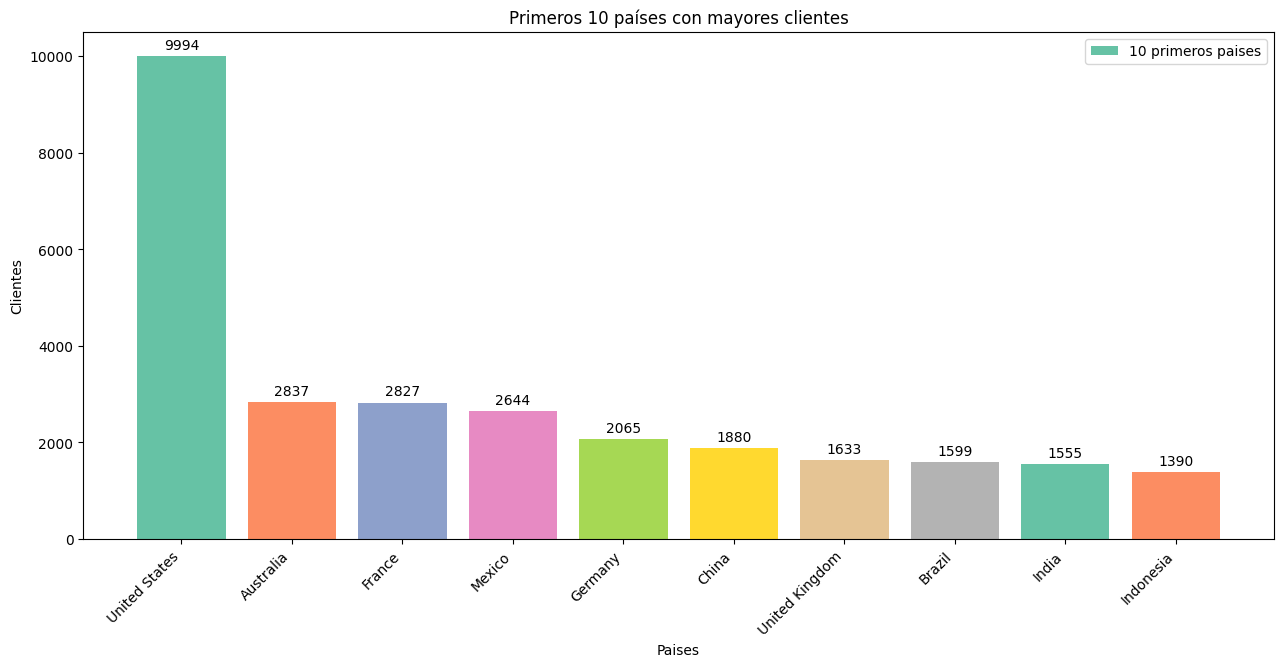

In [110]:
plt.figure(figsize=(25, 12))
ax1 = plt.subplot(2,2,1)
width = 0.8

color = sns.color_palette("Set2")

# Datos
paises = clientes_paises["Country"].iloc[0:10]
frecuencias = clientes_paises["Frecuencia"].iloc[0:10]
x_pos = np.arange(len(paises))


# Crear barras
bars = ax1.bar(x_pos,
        frecuencias, 
        width=width,
        color=color)

# Configurar ejes
ax1.set_xticks(x_pos)
ax1.set_xticklabels(paises, rotation=45, ha="right")
ax1.set_title("Primeros 10 países con mayores clientes")
ax1.set_xlabel("Paises")
ax1.set_ylabel("Clientes")
ax1.set_ylim(top=10500)

# Agregar
ax1.bar_label(bars, fmt='%.0f', padding=3)

ax1.legend(["10 primeros paises"])

plt.tight_layout()
plt.show()

La lista anterior muestra los 10 paises donde se realiza la mayor cantidad de compras.

# Análisis de producto

1. ¿Qué país tiene mayores ventas?

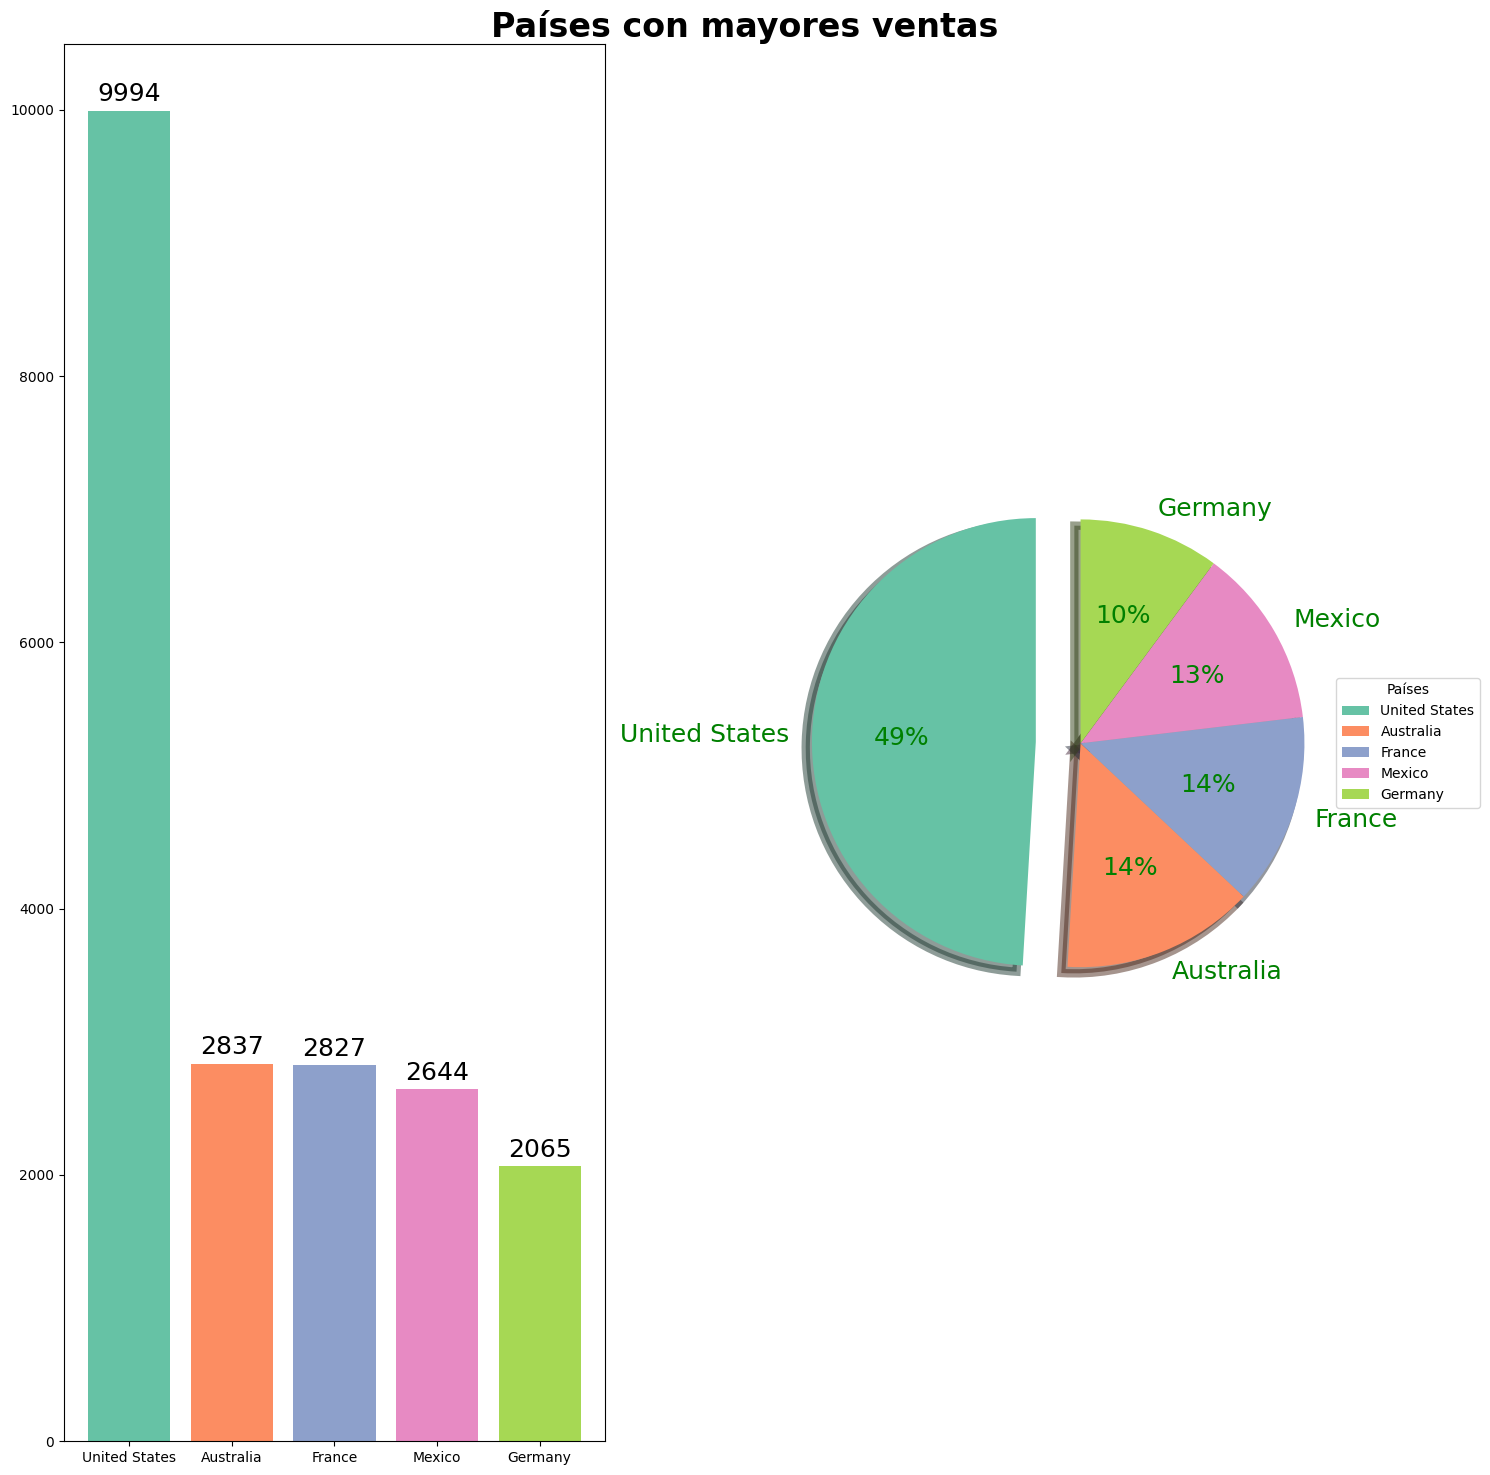

In [123]:
# Crear el dataframe con los cinco primeros países con más ventas
paises = data.groupby("Country")["Order ID"].count().reset_index()
paises.columns = ["Country", "Ventas"]
top_paises = paises.sort_values(by="Ventas", ascending=False).iloc[0:5]

# Números de filas y columnas
rows = 1
cols = 2

# Creando la cuadricula y la figura
fig, ax = plt.subplots(rows, cols, figsize=(15, 15))
ax = ax.flatten() # Aplanando los ejes

# Parámetros de la figura (Separar porción del centro y color)
explode=[0.2, 0, 0, 0, 0]
color = sns.color_palette('Set2')
fig.suptitle("Países con mayores ventas", fontsize=24, fontweight='bold') # Título general de la figura

# Gráfico de barras
bars = ax[0].bar(top_paises["Country"], # Valores eje x
                 height=top_paises["Ventas"], # Etiquetas eje y
                 color=color) # Color de las barras

# Añadir valores encima de las barras (Se debe guardar el gráfico de barras en una variable)
ax[0].bar_label(bars,  
                fmt="%.0f", # Formato de los valores a mostrar
                padding=3, # Distancia del texto a las barras
                fontsize=18) # Tamaño de letra
ax[0].axis("on")

# Gráfico circular
ax[1].pie(top_paises["Ventas"], # Valores
          labels=top_paises["Country"], # Etiquetas
          colors=color, # Colores de las porciones
          autopct="%0.0f%%", # Formato para mostrar los valore dentro de las porciones
          shadow=True, # Sombra del gráfico circular
          explode=explode, # Resaltar una porción alejandola del centro
          startangle=90, # Define el ángulo desde donde comienza el primer segmento del gráfico
          textprops={"color": "Green", "fontsize": 18}, # Características del texto de las porciones
          wedgeprops={"linewidth": 6}, # Ancho de la sombra
          center=(0.1, 0.1),
          rotatelabels=False) # Rotar las etiquetas

ax[1].legend(title="Países", # Agrega la letenda paises en el centro a la derecha encerrada en una 
             loc="center left", # Ubicación de la leyenda dentro del gráfico
             bbox_to_anchor=(1, 0, 0.5, 1)) # Indica una área de ubicación de la leyenda fuera del gráfico

plt.axis("equal") # Ajusta los ejes X y Y de los gráficos para que tengan las mismas proporciones
plt.tight_layout()
plt.show()

El país que tiene mayores ventas es United States

2. ¿Cuáles son los 5 tipos de productos que generan mayores ganancias anualmente?

In [124]:
# Crear un dataframe con las columnas necesarias para el análisis
productos = data.groupby(['Year', 'Sub-Category'])['Profit'].sum().reset_index()
productos = productos.sort_values(by=['Year', 'Profit'], ascending=[True, False]) # Ordenando por mayor ganancia
top_productos = productos.groupby("Year").head(5)

for year in top_productos["Year"].unique():
    print(f"El top de productos más vendidos en {year}")
    print(top_productos[top_productos["Year"] == year][["Sub-Category", "Profit"]])
    print("\n")

El top de productos más vendidos en 2011
   Sub-Category       Profit
13       Phones  53927.48950
6       Copiers  30375.09344
5        Chairs  29943.15710
4     Bookcases  27518.85750
1    Appliances  22838.44130


El top de productos más vendidos en 2012
   Sub-Category      Profit
23      Copiers  51843.2276
30       Phones  45223.0498
17  Accessories  33507.1002
22       Chairs  28755.3467
21    Bookcases  28137.2671


El top de productos más vendidos en 2013
   Sub-Category       Profit
40      Copiers  72300.69118
47       Phones  46908.82520
38    Bookcases  43049.24440
35   Appliances  41485.51600
39       Chairs  40449.49210


El top de productos más vendidos en 2014
   Sub-Category        Profit
57      Copiers  104048.53596
64       Phones   70657.64130
55    Bookcases   63219.05050
52   Appliances   53040.50050
51  Accessories   41593.92860




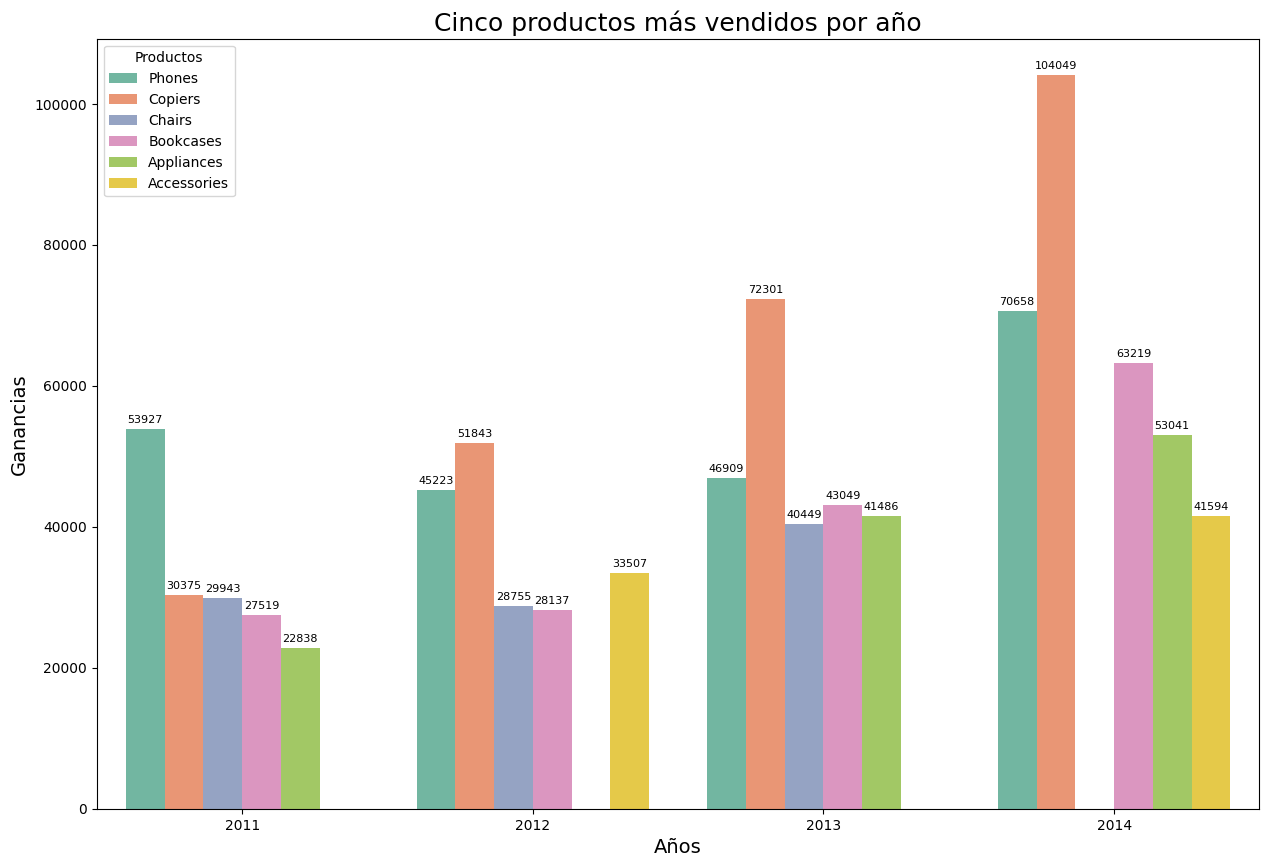

In [125]:
# Creando cuadricula y figura 
plt.figure(figsize=(15, 10))

# sns.barplot devuelve un objeto axes
bars = sns.barplot(data=top_productos, x="Year", y="Profit", hue="Sub-Category", palette="Set2", dodge=True)

# 🔹 Obtener los contenedores de barras generados por Seaborn
for container in bars.containers:
    bars.bar_label(container, fmt="%.0f", padding=3, fontsize=8)  # Etiquetas en las barras

plt.title("Cinco productos más vendidos por año", fontsize=18)
plt.xlabel("Años", fontsize=14)
plt.ylabel("Ganancias", fontsize=14)
plt.legend(title="Productos", # Agrega la letenda paises en el centro a la derecha encerrada en una 
             loc="upper left", # Ubicación de la leyenda dentro del gráfico
             ) # Indica una área de ubicación de la leyenda fuera del gráfico
plt.show()


3. ¿Cómo varía el precio del producto con las ventas? ¿Hay algún aumento en las ventas con la disminución del precio a nivel diario?

In [126]:
# Creando la columna day
data["Day"] = data["Order Date"].dt.day
data["Unit Price"] = data["Sales"] / data["Quantity"]

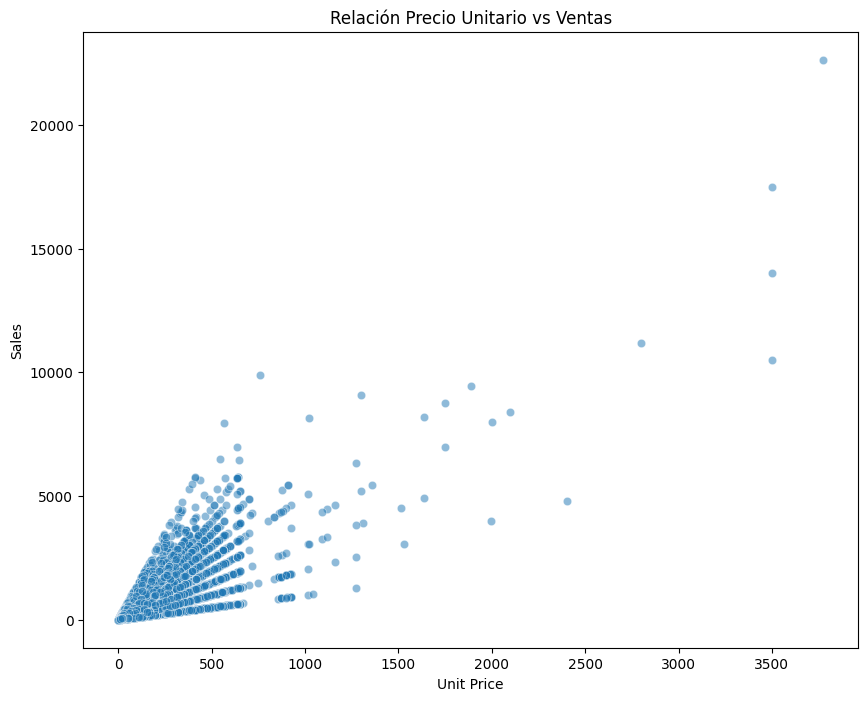

In [127]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Unit Price", y="Sales", data=data, alpha=0.5)

plt.title("Relación Precio Unitario vs Ventas")
plt.show()

Se observa que a medida que aumenta el precio del producto aumenta ligeramente las ventas, siendo este un comportamiento extraño. Aunque, esto no es totalmente claro.

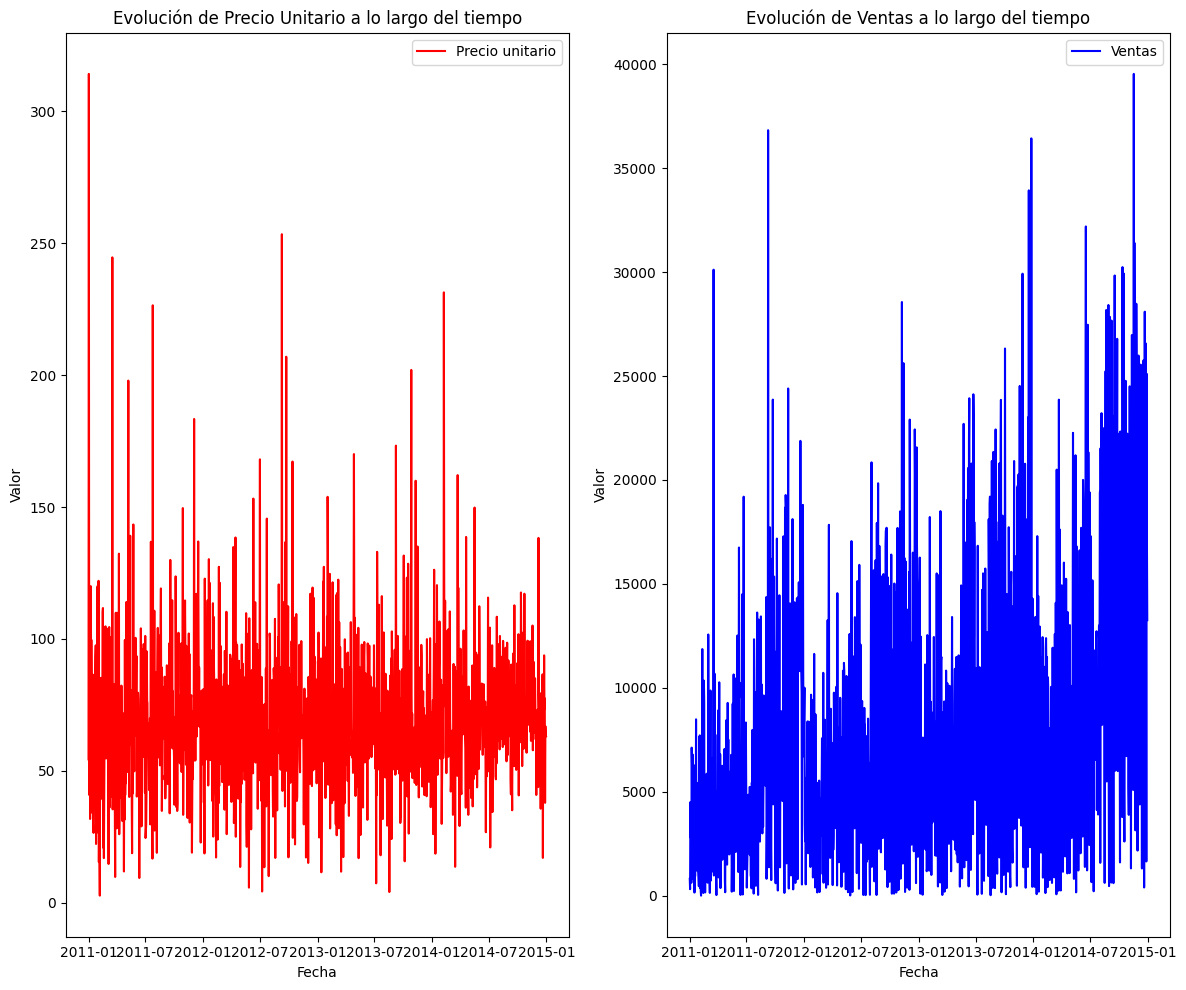

In [128]:
# .agg después de aplicar una agrupación, permite aplicar una o más funciones de agregación a las columnas
sales_day = data.groupby("Order Date").agg({"Unit Price": "mean", "Sales": "sum"}).reset_index() 
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)

sns.lineplot(x="Order Date", y="Unit Price", data=sales_day, label="Precio unitario", color="red")

plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Evolución de Precio Unitario a lo largo del tiempo")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x="Order Date", y="Sales", data=sales_day, label="Ventas", color="b")

plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Evolución de Ventas a lo largo del tiempo")
plt.legend()

plt.tight_layout()
plt.show()

La evaluación através del tiempo a nivel diario no muestra un patrón claro del comportamiendo de las ventas cuando el precio del producto cambia.

In [129]:
correlacion = sales_day["Unit Price"].corr(sales_day["Sales"])
print(f"Correlación entre Precio Unitario y Ventas: {correlacion:.2f}")

Correlación entre Precio Unitario y Ventas: 0.31


El valor de correlación es levemente superior a 0, indicando que, cuando el precio del producto aumenta, las ventas también aumentan. Como se mencionó anteriormente, esto es poco común.

4. ¿Cuál es el tiempo de entrega promedio en los condados? Gráfico de barras

In [130]:
data["Tiempo Entrega"] = data["Ship Date"] - data["Order Date"]

In [131]:
# Dataframe con el tiempo de entrega promedio por estado
entrega_pedidos = data.groupby(["State"]).agg({"Tiempo Entrega": "mean"}).reset_index()
# Convirtiendo a ti_timedelta para realizar operaciones entre fechas
entrega_pedidos["Tiempo Entrega"] = pd.to_timedelta(entrega_pedidos["Tiempo Entrega"])
entrega_pedidos["Tiempo Entrega"] = entrega_pedidos["Tiempo Entrega"].dt.days
entrega_pedidos = entrega_pedidos.sort_values(by="Tiempo Entrega", ascending=False)
entrega_pedidos[entrega_pedidos["Tiempo Entrega"] == 1].State.to_list()


['Mary',
 'Namibe',
 'Nigde',
 'Hunedoara',
 'Sibiu',
 'Adiyaman',
 'Shkodër',
 'Tabora',
 'Tambov',
 'Qinghai',
 'Qostanay',
 'Sergipe',
 'Khánh Hòa',
 'Maradi',
 'Värmland',
 'Mbeya',
 'Hiroshima',
 'Kherson',
 'Monseñor Nouel']

In [132]:
import plotly.express as px
import nbformat

# Facilitar la visualización de grandes cantidades de datos con plotly
fig = px.bar(entrega_pedidos, x="State", y="Tiempo Entrega", title="Tiempo de entrega por estado")
fig.update_layout(title_x=0.5,
                  xaxis_title="Estado", 
                  yaxis_title="Tiempo de entrega (días)",
                  xaxis={'categoryorder': 'total descending'}, 
                  xaxis_tickangle=-45)

fig.show()

Los estados con mayor tiempo de entrega promedio son:
'Lima', 
'Yaracuy', 
'Jizzakh', 
'Karaman', 
'Ar Raqqah', 
'Tokat', 
'Saga', 
'Cojedes',
'Catamarca' 
**con 7 días.**

Los estados con menor tiempo de entrega promedio son: 
'Mary',
'Namibe',
'Nigde',
'Hunedoara',
'Sibiu',
'Adiyaman',
'Shkodër',
'Tabora',
'Tambov',
'Qinghai',
'Qostanay',
'Sergipe',
'Khánh Hòa',
'Maradi',
'Värmland',
'Mbeya',
'Hiroshima',
'Kherson',
'Monseñor Nouel'
**Con 1 día.**